# Hierarchical Clustering

In [2]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [3]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## Generating Sample Data

(150, 2)


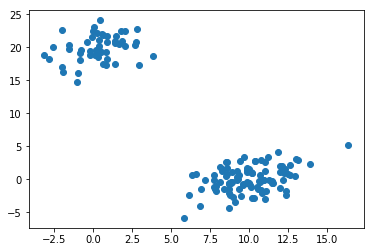

In [4]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

## Perform the Hierarchical Clustering

In [5]:
# generate the linkage matrix
Z = linkage(X, 'average')

In [6]:
Z

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.15356,    3.     ],
       [  41.     ,  158.     ,    0.1618 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  22.     ,  150.     ,

In [7]:
Z[0]

array([ 52.     ,  53.     ,   0.04151,   2.     ])

In [8]:
Z[1]

array([ 14.     ,  79.     ,   0.05914,   2.     ])

In [9]:
Z[:20]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.15356,    3.     ],
       [  41.     ,  158.     ,    0.1618 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  22.     ,  150.     ,

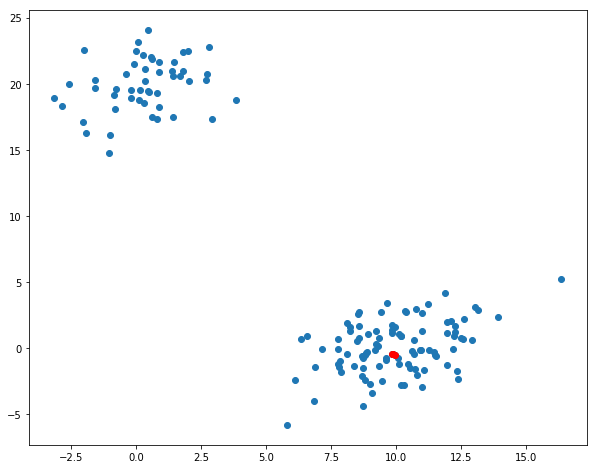

In [10]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

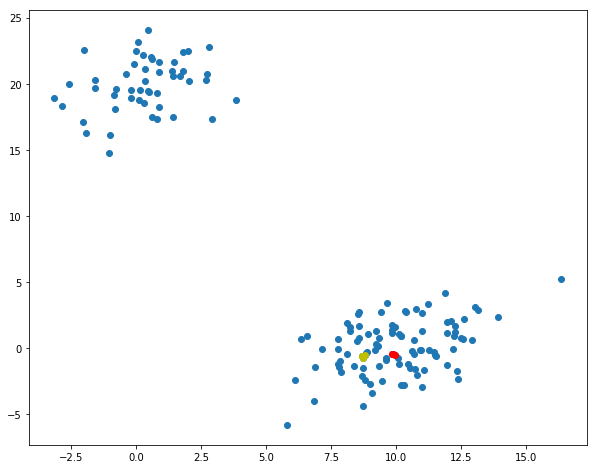

In [11]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
idxs = [15, 69, 41]
plt.scatter(X[idxs,0], X[idxs,1], c='y')
plt.show()

## Plotting a Dendrogram

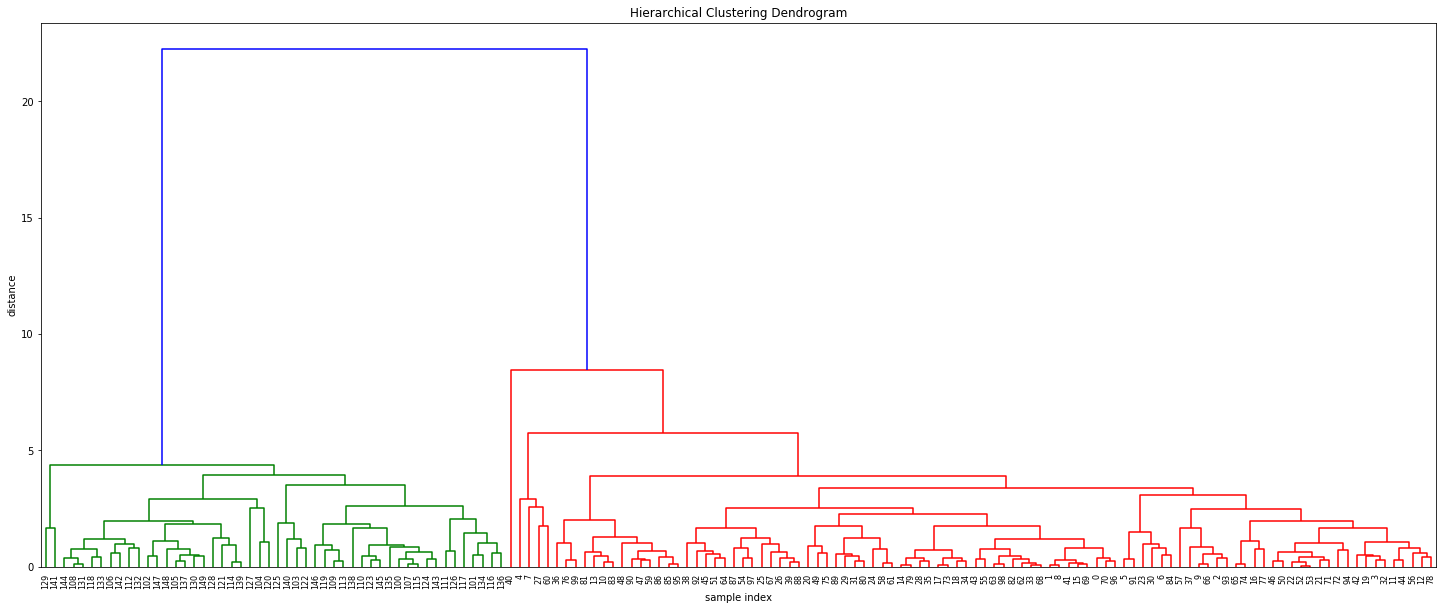

In [12]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8., 
)
plt.show()

In [13]:
Z[-4:,2]

array([  4.35849,   5.74066,   8.45467,  22.25792])

## Dendrogram Truncation

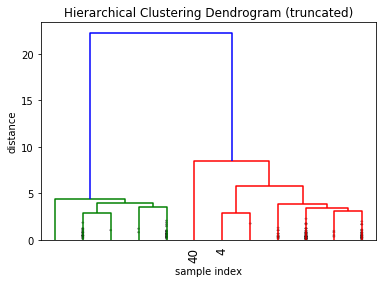

In [14]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

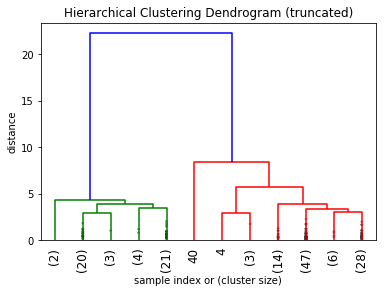

In [15]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [16]:
from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

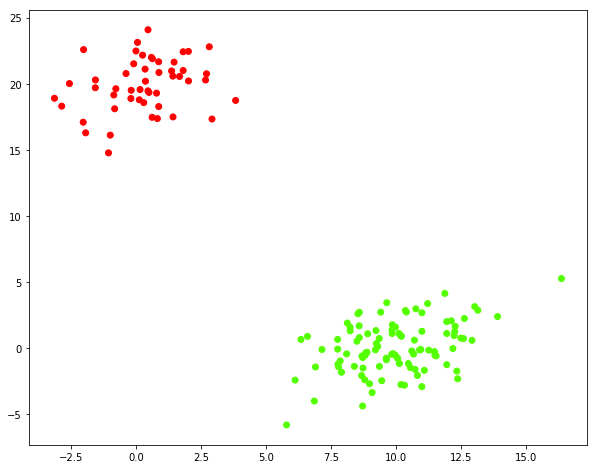

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## Hierarchical Clustering on real dataset

#### Example data has been downloaded from the open access Human Gene Expression Atlas and represents typical data bioinformaticians work with. It is "Transcription profiling by array of brain in humans, chimpanzees and macaques, and brain, heart, kidney and liver in orangutans" experiment in a tab-separated format.

In [18]:
data = np.genfromtxt("data/ExpRawData-E-TABM-84-A-AFFY-44.tab",names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")

In [20]:
print (len(data))
print (len(data.dtype.names))

54674
29


In [21]:
data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()

In [23]:
print (data_array)

[[  6.37398   5.98618   7.46812 ...,  11.74509  13.2778   13.06717]
 [  6.49817   4.86117   6.948   ...,  11.33983  13.03199  12.72444]
 [  6.27177   5.5667    6.94358 ...,  11.8404   13.33248  13.05137]
 ..., 
 [  6.1121    5.03247   6.93343 ...,  11.41125  13.08459  12.76858]
 [  6.35985   6.12955   8.46082 ...,  10.81494  12.88879  12.67379]
 [  6.01091   5.45382   6.82081 ...,  11.46787  13.08952  12.79205]]


In [24]:
from scipy.spatial.distance import pdist, squareform

In [25]:
data_dist = pdist(data_array) # computing the distance
data_link = linkage(data_dist) # computing the linkage

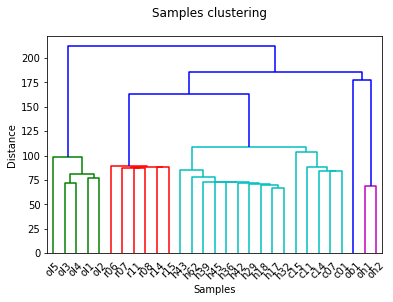

In [30]:
dendrogram(data_link,labels=data.dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering');